# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.58855376 2.0681269  2.24009571 2.89405928 2.70588276 2.24039283
 2.54339176 2.33561535 2.61022668 2.99863397]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [2]:
# Function that generates uniformly distributed random numbers
import numpy as np

def uniform_func(bottom, ceiling, count):
    array = np.random.uniform(bottom, ceiling, count)
    return array

In [3]:
# Call your function with 2 sets of params below

#bottom=10, ceiling=15, count=100
array1 = uniform_func(10, 15, 100)

#bottom=10, ceiling=60, count=1000
array2 = uniform_func(10, 60, 1000)

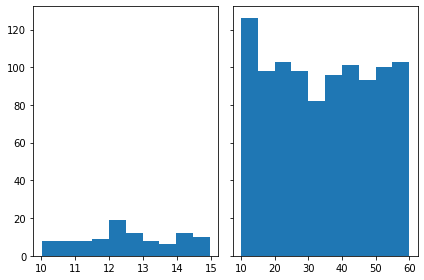

In [4]:
#Plot the uniform distributions generated above using histograms

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)
axs[0].hist(array1, bins = 10)
axs[1].hist(array2, bins = 10)
plt.show()

How are the two distributions different?

In [5]:
#When we are extracting a largest sample, we have a smaller STD (less dispersion of the data)

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [6]:
def normal_func(mean, std, size):
    array = np.random.normal(mean, std, size)
    return array

In [7]:
array3 = normal_func(10, 1, 1000)
array4 = normal_func(10, 50, 1000)

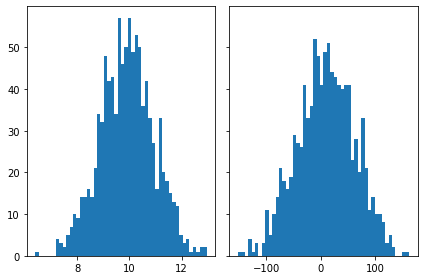

In [8]:
fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)
axs[0].hist(array3, bins = 50)
axs[1].hist(array4, bins = 50)
plt.show()

How are the two distributions different?

In [9]:
# The second graph has a more distribution of the values because we have a higher Standard Deviation.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [10]:
import pandas as pd

vehicles = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-probability-distributions\\your-code\\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

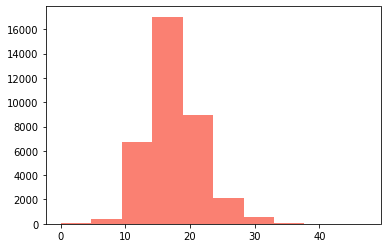

In [11]:
plt.hist(vehicles["Fuel Barrels/Year"], color = "salmon")
plt.show()

2. CO2 Emission Grams/Mile 

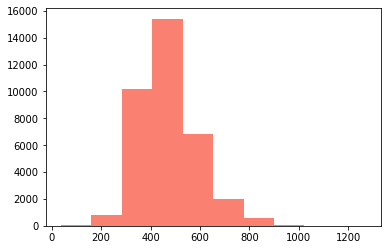

In [12]:
plt.hist(vehicles["CO2 Emission Grams/Mile"], color = "salmon")
plt.show()

3. Combined MPG

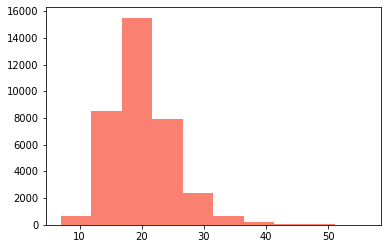

In [13]:
plt.hist(vehicles["Combined MPG"], color = "salmon")
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [14]:
import scipy.stats

graph1 = scipy.stats.skew(vehicles['Fuel Barrels/Year'])
graph2 = scipy.stats.skew(vehicles['CO2 Emission Grams/Mile'])
graph3 = scipy.stats.skew(vehicles['Combined MPG'])

print('For Fuel Barrels/Year, the skweness is', graph1)
print('For CO2 Emission Grams/Mile, the skweness is', graph2)
print('For Combined MPG, the skweness is', graph3)

For Fuel Barrels/Year, the skweness is 0.6382445784906976
For CO2 Emission Grams/Mile, the skweness is 0.7416608937445333
For Combined MPG, the skweness is 1.0677281511016457


In [15]:
#The first graph that shows the Fuel Barrels/Year using the calculation of the skweness, it is the one more closer to the 
# normal distribuition (more closer to 0).

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [25]:
def exponential_func(scale, size):
    array = np.random.exponential(scale = scale, size = size)
    return array

In [26]:
array5 = exponential_func(1, 1000)
array6 = exponential_func(100, 1000)

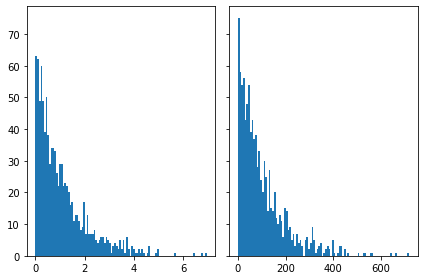

In [27]:
fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)
axs[0].hist(array5, bins = 100)
axs[1].hist(array6, bins = 100)
plt.show()

How are the two distributions different?

In [28]:
# In the second graph, we have a higher mean, so we have higher random numbers.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [29]:
# Hint: This is same as saying P(x<15)

from scipy.stats import expon

exponential_dist = expon(scale = 10)

exponential_dist.cdf(15)
print("The probability of a customer spend less than fifteen minutes in the bank is", exponential_dist.cdf(15)*100, "%.")

The probability of a customer spend less than fifteen minutes in the bank is 77.68698398515703 %.


What is the probability that the customer will spend more than 15 minutes

In [30]:
1 - exponential_dist.cdf(15)

print("The probability of a customer spend more than fifteen minutes in the bank is", (1 - exponential_dist.cdf(15))*100, "%.")

The probability of a customer spend more than fifteen minutes in the bank is 22.31301601484298 %.
